## Feed Forward Neural Networks

In [ ]:
import matplotlib.pylab as plt
import numpy as np
from sklearn.neural_network import MLPClassifier

In [ ]:
# Build the Dataset
np.random.seed(8675309)
x0 = np.random.random(50)-0.3
y0 = np.random.random(50)+0.3
x1 = np.random.random(50)+0.3
y1 = np.random.random(50)-0.3

In [ ]:
print(x0)

[ 0.51245912  0.45104509  0.05736652 -0.09770522  0.10900113 -0.21787527
 -0.08501348  0.11388092 -0.28183262  0.36977656  0.30010341  0.61928216
  0.04272827  0.25517967  0.4175205  -0.12136827  0.62911262  0.46151484
 -0.17975467  0.33567192 -0.17429045 -0.1866768   0.52125878  0.65711448
 -0.24399086  0.37894113 -0.20817644  0.55470627 -0.22770305  0.68184624
  0.59070631  0.09481143  0.05510899  0.444181   -0.06943107 -0.26494963
  0.59162548  0.28588214 -0.13794413  0.51281652  0.47525212  0.23070813
  0.10311752 -0.28619889  0.25214997 -0.15211638  0.35092993  0.49531505
  0.61613329  0.42301011]


In [ ]:
print(y0)

[0.44458879 0.36698512 0.98511685 0.45993645 1.04455678 0.85483474
 0.66790419 1.24035774 0.60767967 0.58289265 1.07229843 0.88222042
 0.70035592 0.46892103 1.01137819 0.61700092 1.27910128 0.52596007
 1.22156804 1.02927685 0.94190927 0.46719346 0.61100485 0.43512153
 0.62508319 0.37907039 0.70082291 1.17058605 0.84088813 1.06673689
 0.32537225 0.80674969 0.40144035 0.84618898 1.16572646 1.06919227
 1.07913117 0.56910056 0.46007123 0.49994528 0.31979948 0.53453884
 1.08519724 1.18426356 1.09275328 0.53974285 0.60243451 1.08762643
 1.2630152  0.38542485]


In [ ]:
len(x0)

50

In [ ]:
print("x0,y0: %0.6f, %0.6f" % (x0.mean(), y0.mean()))
print("x1,y1: %0.6f, %0.6f" % (x1.mean(), y1.mean()))
print()

x0,y0: 0.201105, 0.772381
x1,y1: 0.777839, 0.245307



In [ ]:
x = np.zeros((100, 2))
x[:50,0] = x0; x[:50,1] = y0
x[50:,0] = x1; x[50:,1] = y1

In [ ]:
y = np.array([0]*50 + [1]*50)

In [ ]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
x[:1]

array([[0.51245912, 0.44458879]])

In [ ]:
# randomize and make train/test split
idx = np.argsort(np.random.random(100))

In [ ]:
idx

array([24, 33, 82, 14,  2, 63, 22,  9, 64, 72, 32, 19,  3, 73, 20, 93, 39,
       25, 26, 90,  1, 13, 37, 56, 28, 53, 48, 55, 42, 18, 94, 16, 89, 74,
       70, 34, 21, 99, 58, 87, 95, 71, 59,  5, 57, 98, 46, 30,  0, 29, 36,
       49, 86, 40, 17, 47, 61, 60, 76, 97,  8, 31, 52, 85, 67, 92, 11, 80,
       62, 15, 83, 23, 12, 54, 78, 44, 38,  6, 84, 27, 45, 91, 68, 75,  4,
       79, 43, 65, 69, 66, 10, 96, 35, 50,  7, 51, 41, 81, 77, 88])

In [ ]:
x  = x[idx]
y = y[idx]

In [ ]:
x_train = x[:75]
y_train = y[:75]

In [ ]:
x_test = x[75:]
y_test = y[75:]

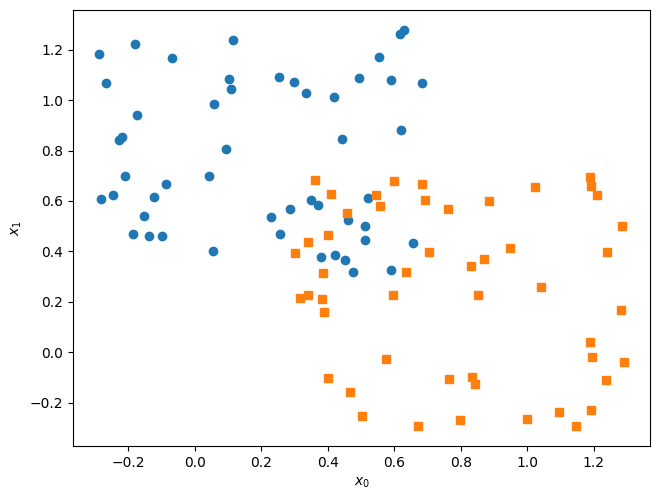

In [ ]:
# Show the dataset
plt.plot(x0, y0, marker='o', linestyle='none')
plt.plot(x1, y1, marker='s', linestyle='none')
plt.xlabel(r'$x_0$') # Corrected xlabel
plt.ylabel(r'$x_1$') # Corrected ylabel
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.savefig("c04_nn.png", dpi=300)

In [ ]:
# Train a simple model
clf = MLPClassifier(hidden_layer_sizes=(5,))
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
prob = clf.predict_proba(x_test)
print("Model accuracy on test set: %0.4f" %score)
w0 = clf.coefs_[0].T
b0 = clf.intercepts_[0].reshape((5, 1))
w1 = clf.coefs_[1].T
b1 = clf.intercepts_[1]


Model accuracy on test set: 0.9200


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print("Weights and biases: ")
print(w0)
print(b0)
print(w1)
print(b1)
print()

Weights and biases: 
[[ 0.11163935  1.01812176]
 [ 0.41966003 -0.54722927]
 [ 0.1374358   0.61592217]
 [-0.4274122  -0.22520957]
 [-0.78696373 -0.47214619]]
[[-0.05593697]
 [ 0.23807549]
 [-0.28033448]
 [-0.3133039 ]
 [ 0.90149193]]
[[-0.38306849  1.22745716 -0.93849078  0.32985919 -0.6387949 ]]
[0.34040456]



In [ ]:
z = x_test[0].reshape((2, 1))
print("x_test:", z)
print("w0 @ z + b0", w0 @ z + b0)
print("a0 = relu(w0 @ z + b0)", np.maximum(0, w0@z+b0))
a0 = np.maximum(0, w0@z+b0)
print("a1 = w1@a0 + b1", w1@a0+b1)
a1 = w1@a0+b1
print("sigmoid(a1)", 1.0/(1.0+np.exp(-a1)))
print()
print("prob: ", prob[0][1])
print("y_test: ", y_test[0])
print()

x_test: [[0.25214997]
 [1.09275328]]
w0 @ z + b0 [[ 1.08476878]
 [-0.25409382]
 [ 0.42737092]
 [-0.66717436]
 [ 0.18711976]]
a0 = relu(w0 @ z + b0) [[1.08476878]
 [0.        ]
 [0.42737092]
 [0.        ]
 [0.18711976]]
a1 = w1@a0 + b1 [[-0.59575099]]
sigmoid(a1) [[0.3553164]]

prob:  0.3553164003942199
y_test:  0



## Convolutional Neural Network

In [ ]:
import numpy as np

In [ ]:
x = np.linspace(-3, 3, 20)
f = (255*np.exp(-0.5*x**2)).astype("int32")
g = np.array([-1, 0, 1])
fp = np.convolve(f, g[::-1], mode='same')

In [ ]:
g[::-1]

array([ 1,  0, -1])

In [ ]:
f

array([  2,   6,  15,  31,  56,  92, 138, 186, 227, 251, 251, 227, 186,
       138,  92,  56,  31,  15,   6,   2], dtype=int32)

In [ ]:
np.exp(1)

2.718281828459045

In [ ]:
fp

array([  6,  13,  25,  41,  61,  82,  94,  89,  65,  24, -24, -65, -89,
       -94, -82, -61, -41, -25, -13,  -6])

### Convolution in Two Dimensions

In [ ]:
import numpy as np
from scipy.signal import convolve2d
from scipy.misc import face
from PIL import Image

In [ ]:
img = face(True)
img = img[:512, (img.shape[1]-612) : (img.shape[1]-100)]

<ipython-input-2-162da5e6f7bd>:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  img = face(True)


In [ ]:
# An asymmetric kernel
k = np.array([[1, 0, 0], [0, -8, 0], [0, 0, 3]])
c = convolve2d(img, k, mode='same')

In [ ]:
# Results
print("Original: ")
print(img[:8, :8])
print()
print("Kernel: ")
print(k)
print()
print("convolve2d(img, k, mode='same')")
print(c[1:8, 1:8])
print()




Original: 
[[ 88  97 112 127 116  97  84  84]
 [ 62  70 100 131 126  88  52  51]
 [ 41  46  87 127 146 116  78  56]
 [ 42  45  76 107 145 137 112  76]
 [ 58  59  69  79 111 106  90  68]
 [ 74  73  68  60  72  74  72  67]
 [ 92  87  75  63  57  74  91  93]
 [105  97  85  74  60  79 102 110]]

Kernel: 
[[ 1  0  0]
 [ 0 -8  0]
 [ 0  0  3]]

convolve2d(img, k, mode='same')
[[-209 -382 -566 -511 -278  -69 -101]
 [-106 -379 -571 -638 -438 -284 -241]
 [-168 -391 -484 -673 -568 -480 -318]
 [-278 -357 -332 -493 -341 -242 -143]
 [-335 -304 -216 -265 -168 -165 -184]
 [-389 -307 -240 -197 -274 -396 -427]
 [-404 -331 -289 -215 -368 -476 -488]]



In [ ]:
if (c.min() < 0):
  c = c + np.abs(c.min())
c = (255*(c / c.max())).astype("uint8")

In [ ]:
Image.fromarray(c).save("ricky_convol.png")
Image.fromarray(img).save("ricky_orig.png")
